In [1]:
from PosSelect_Functions_Old import *
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import pandas as pd
import numpy as np
import copy
import seaborn as sns
from scipy.stats import mannwhitneyu as mwu
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import fdrcorrection
from scipy.stats import wilcoxon
from scipy.optimize import curve_fit
from scipy.stats import fisher_exact
from scipy.stats import norm
from collections import Counter
from scipy.stats import binomtest
import os

hfont = {'fontname':'Arial'}
plt.rcParams["font.family"] = "Arial"

#Code borrowed heavily from here: https://stackoverflow.com/questions/62375034/find-non-overlapping-area-between-two-kde-plots
plt.rcParams.update(
    {"text.usetex": False}
)

def parse_table(i):
    return [int(x) for x in i.replace("[", "").replace("]", "").split(",")]

d_abrev = {"LiangSteinNeuron":"FC exc. neur.", "FetalChondrocytes":"F chond.", "SertoliMale":"FG sertoli", "preGC_IIaFemale":"FG preGC IIa",\
          "NeuralFemale":"FG neur.", "FetalGonadImmuneFemale":"FG immune", "VIP":"AC VIP inh. neur.", "LiangSteinProgenitor":"FC prog.",\
          "AdultHeartVentricularCardiomyocyte":"AH cardiomyo.", "AdultLoopOfHenle":"AK loop of henle", "FetalBrainNeurGlioblast_CB_VZ":"FCB glioblast",\
         "AdultProximalTubule":"AK prox. tub.", "FetalLeydigMale":"FG leydig", "SST":"AC SST inh neur.", "KosoyRoussosControlMicroglia":"AC microglia",\
         "FetalBrainFloorPlate":"FB fl. plate", "FetalArterialECs":"FH endoth.", "ASCT":"AC astro.", "FetalBrainCOP":"FB COP",\
         "AMY":"AA neur.", "PVALB":"AC PVALB inh neur.", "ITL23":"AC L2-3 IT neur.", "FetalBrainNeurCB_GNP_IPC_1":"FB inter. prog.", "FetalBrainNeurDAergic":"FB DA neur.",\
          "OGC":"AC Oligo.", "D1Pu":"AP D1 inh neur.", "FetalBrainNeurSerotonergic":"FB 5-HT neur.", "FetalBrainNeurDRG_2":"FS DRG neur.",\
          "FetalHeartPericytes":"FH peri.", "FetalHeartEndocardium":"FH endocard.", "FetalHeartCardiacFibroblasts":"FH fibro.", "FetalBrainNeurPurkinje_6":"FCB Purk. inh neur.",\
          "AdultHeartSmoothMuscle":"AH smooth musc.", "FetalBrainRoofPlate":"FB ro. plate"}

C:\Users\astar\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [87]:
df = pd.DataFrame()
for file in os.listdir("MutTargetSize"):
    if "Alpha" in file:
        v = pd.read_csv("MutTargetSize/" + file, sep = "\t")
v

,ID,StartSpecSup,Big_Cutoff,PosLFC_Cutoff,NegLFC_Cutoff,Metric,Median Fixed PhyloP,Number Fixed Variants,Median Polymorphic PhyloP,Number Polymorphic Variants,Fisher exact p-value,MWU p-value,Fisher exact p-value; alt greater,MWU p-value; alt greater,alpha,Cutoff,"[[dc1, du1], [pc1, pu1]]","[[dc2, du2], [pc2, pu2]]",Proportion
0,NoChange,0,15000,0.480604,-0.471499,Absolute log fold-change,0.579427,30002,0.580003,8284,7.375702e-01,4.072920e-01,0.637502,0.796354,-0.008460,0.580003,"[[14936, 15066], [4141, 4143]]","[[14936, 15066], [4142, 4142]]",0.50
1,NoChange,0,15000,0.480604,-0.471499,PhyloP447,0.023000,30002,0.029000,8284,3.431129e-01,2.305769e-01,0.833112,0.884712,-0.024003,0.029000,"[[14786, 15216], [4129, 4155]]","[[14824, 15178], [4145, 4139]]",0.50
2,NoChange,0,15000,0.480604,-0.471499,Absolute log fold-change,0.579427,30002,0.580003,8284,3.676049e-01,4.072920e-01,0.821550,0.796354,-0.023297,0.617136,"[[11835, 18167], [3313, 4971]]","[[11835, 18167], [3314, 4970]]",0.60
3,NoChange,0,15000,0.480604,-0.471499,PhyloP447,0.023000,30002,0.029000,8284,2.182196e-01,2.305769e-01,0.893727,0.884712,-0.031793,0.191000,"[[11769, 18233], [3313, 4971]]","[[11797, 18205], [3318, 4966]]",0.60
4,NoChange,0,15000,0.480604,-0.471499,Absolute log fold-change,0.579427,30002,0.580003,8284,9.729903e-01,4.072920e-01,0.521434,0.796354,-0.001062,0.662232,"[[8995, 21007], [2485, 5799]]","[[8995, 21007], [2486, 5798]]",0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,NoRepeatsNoPseudos,250,All,0.000000,0.000000,PhyloP447,-0.001000,3588538,0.004000,930810,1.612287e-15,3.717574e-16,1.000000,1.000000,-0.023511,0.771000,"[[704401, 2884137], [186159, 744651]]","[[705172, 2883366], [186338, 744472]]",0.80
380,NoRepeatsNoPseudos,250,All,0.000000,0.000000,Absolute log fold-change,0.029945,3588538,0.030728,930810,8.068467e-10,3.611093e-41,1.000000,1.000000,-0.024202,0.120892,"[[351202, 3237336], [93080, 837730]]","[[351202, 3237336], [93081, 837729]]",0.90
381,NoRepeatsNoPseudos,250,All,0.000000,0.000000,PhyloP447,-0.001000,3588538,0.004000,930810,1.255261e-17,3.717574e-16,1.000000,1.000000,-0.033882,1.444000,"[[348018, 3240520], [93026, 837784]]","[[348365, 3240173], [93113, 837697]]",0.90
382,NoRepeatsNoPseudos,250,All,0.000000,0.000000,Absolute log fold-change,0.029945,3588538,0.030728,930810,1.007176e-04,3.611093e-41,0.999950,1.000000,-0.021051,0.173850,"[[175909, 3412629], [46540, 884270]]","[[175909, 3412629], [46541, 884269]]",0.95


In [94]:
v = pd.read_csv("MutTargetSize/" + file, sep = "\t")
v = v[v["Big_Cutoff"] == "All"]
v[v['Proportion'] == 0.6]

,ID,StartSpecSup,Big_Cutoff,PosLFC_Cutoff,NegLFC_Cutoff,Metric,Median Fixed PhyloP,Number Fixed Variants,Median Polymorphic PhyloP,Number Polymorphic Variants,Fisher exact p-value,MWU p-value,Fisher exact p-value; alt greater,MWU p-value; alt greater,alpha,Cutoff,"[[dc1, du1], [pc1, pu1]]","[[dc2, du2], [pc2, pu2]]",Proportion
170,NoChange,0,All,0.0,0.0,Absolute log fold-change,0.028575,10030151,0.029143,2768474,7.699628e-67,4.276169e-73,1.0,1.0,-0.024249,0.039433,"[[3954524, 6075627], [1107389, 1661085]]","[[3954526, 6075625], [1107390, 1661084]]",0.6
171,NoChange,0,All,0.0,0.0,PhyloP447,-0.017000,10030151,0.002000,2768474,2.558509e-187,3.895926e-228,1.0,1.0,-0.041358,0.144000,"[[3910574, 6119577], [1106190, 1662284]]","[[3915119, 6115032], [1107439, 1661035]]",0.6
182,NoRepeatsNoPseudos,0,All,0.0,0.0,Absolute log fold-change,0.029772,4558289,0.030640,1204372,2.085339e-59,3.330595e-63,1.0,1.0,-0.034628,0.042119,"[[1786200, 2772089], [481747, 722625]]","[[1786202, 2772087], [481749, 722623]]",0.6
183,NoRepeatsNoPseudos,0,All,0.0,0.0,PhyloP447,-0.010000,4558289,-0.001000,1204372,6.751282e-19,5.807501e-26,1.0,1.0,-0.018779,0.153000,"[[1801211, 2757078], [481303, 723069]]","[[1803514, 2754775], [481856, 722516]]",0.6
362,NoChange,250,All,0.0,0.0,Absolute log fold-change,0.029533,5498973,0.030244,1443454,2.416598e-53,8.182435e-56,1.0,1.0,-0.029823,0.041641,"[[2160918, 3338055], [577380, 866074]]","[[2160922, 3338051], [577382, 866072]]",0.6
363,NoChange,250,All,0.0,0.0,PhyloP447,-0.017000,5498973,-0.010000,1443454,1.951419e-22,9.292695e-34,1.0,1.0,-0.018802,0.149000,"[[2173235, 3325738], [576881, 866573]]","[[2176223, 3322750], [577712, 865742]]",0.6
374,NoRepeatsNoPseudos,250,All,0.0,0.0,Absolute log fold-change,0.029945,3588538,0.030728,930810,6.810521e-37,3.611093e-41,1.0,1.0,-0.030627,0.042279,"[[1409512, 2179026], [372323, 558487]]","[[1409512, 2179026], [372324, 558486]]",0.6
375,NoRepeatsNoPseudos,250,All,0.0,0.0,PhyloP447,-0.001000,3588538,0.004000,930810,1.234052e-11,3.717574e-16,1.0,1.0,-0.016249,0.175000,"[[1419779, 2168759], [371838, 558972]]","[[1421573, 2166965], [372352, 558458]]",0.6


In [11]:
df2

,ID,StartSpecSup,Big_Cutoff,PosLFC_Cutoff,NegLFC_Cutoff,Metric,Median Fixed PhyloP,Number Fixed Variants,Median Polymorphic PhyloP,Number Polymorphic Variants,Fisher exact p-value,MWU p-value,Fisher exact p-value; alt greater,MWU p-value; alt greater,alpha,Cutoff,"[[dc1, du1], [pc1, pu1]]","[[dc2, du2], [pc2, pu2]]",Proportion,Cell type
26,NoChange,0,30000,0.238901,-0.227535,Absolute log fold-change,0.279276,60002,0.279976,16873,0.086955,0.148970,0.957803,0.925515,-0.031043,0.294827,"[[23563, 36439], [6749, 10124]]","[[23563, 36439], [6750, 10123]]",0.6,AH smooth musc.
26,NoChange,0,30000,0.386451,-0.384921,Absolute log fold-change,0.491558,60002,0.492685,16416,0.349200,0.633225,0.828806,0.683388,-0.017059,0.529952,"[[23758, 36244], [6566, 9850]]","[[23758, 36244], [6567, 9849]]",0.6,AH cardiomyo.
26,NoChange,0,30000,0.486951,-0.496706,Absolute log fold-change,0.642343,60002,0.637796,16676,0.037910,0.022756,0.019110,0.011378,0.036464,0.690702,"[[24538, 35464], [6670, 10006]]","[[24538, 35464], [6671, 10005]]",0.6,AK loop of henle
26,NoChange,0,30000,0.629128,-0.628635,Absolute log fold-change,0.830193,60002,0.825742,16607,0.348049,0.120611,0.175233,0.060305,0.016725,0.898482,"[[24243, 35759], [6642, 9965]]","[[24243, 35759], [6643, 9964]]",0.6,AK prox. tub.
26,NoChange,0,30000,0.352358,-0.349303,Absolute log fold-change,0.465807,60002,0.466618,16374,0.808107,0.529210,0.405275,0.735395,0.004472,0.505143,"[[24065, 35937], [6549, 9825]]","[[24065, 35937], [6550, 9824]]",0.6,AA neur.
26,NoChange,0,30000,0.319729,-0.303000,Absolute log fold-change,0.402359,60002,0.404157,16783,0.061819,0.076918,0.970120,0.961541,-0.034003,0.437140,"[[23522, 36480], [6713, 10070]]","[[23522, 36480], [6714, 10069]]",0.6,AC astro.
26,NoChange,0,30000,0.273314,-0.268965,Absolute log fold-change,0.344427,60002,0.344129,16708,0.535305,0.959310,0.268639,0.479655,0.011114,0.368872,"[[24163, 35839], [6683, 10025]]","[[24163, 35839], [6684, 10024]]",0.6,AP D1 inh neur.
26,NoChange,0,30000,0.462998,-0.449174,Absolute log fold-change,0.586857,60002,0.584823,16850,0.640606,0.696462,0.321826,0.348231,0.008359,0.627716,"[[24120, 35882], [6739, 10111]]","[[24120, 35882], [6740, 10110]]",0.6,FH endoth.
26,NoChange,0,30000,0.666196,-0.667648,Absolute log fold-change,0.880025,60002,0.880687,16211,0.992792,0.535553,0.508602,0.267776,-0.000220,0.952509,"[[23998, 36004], [6484, 9727]]","[[23998, 36004], [6485, 9726]]",0.6,FB COP
26,NoChange,0,30000,0.431768,-0.416028,Absolute log fold-change,0.544847,60002,0.544921,16592,0.778038,0.989382,0.390224,0.505309,0.005143,0.586773,"[[24074, 35928], [6636, 9956]]","[[24074, 35928], [6637, 9955]]",0.6,FB fl. plate


<Axes: xlabel='Big_Cutoff', ylabel='alpha'>

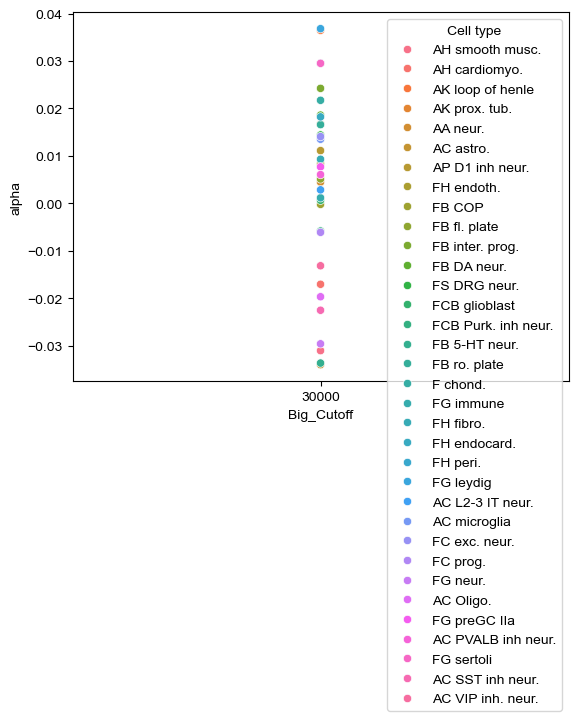

In [7]:
df = pd.DataFrame()
for file in os.listdir("MutTargetSize"):
    if "Alpha" in file:
        v = pd.read_csv("MutTargetSize/" + file, sep = "\t")
        v = v[(v["ID"] == "NoChange") & (v["StartSpecSup"] == 0)]
        v = v[v["Big_Cutoff"] == "30000"]

        v["Cell type"] = np.repeat(d_abrev[file.replace("_Alpha.txt", "")], v.shape[0])
        df = pd.concat([df, v])
df = df.dropna()
df2 = df[df["Metric"] == "Absolute log fold-change"]
df2 = df2[df2["Proportion"] == 0.6]
#df2 = df2[~df2["Big_Cutoff"].isin(["15000", "30000"])]
#df2 = df2[df2["Cell type"].isin(["FC exc. neur.", "FH fibro.", "FH endoth.", "FC prog.", 'AH smooth musc.'])]
sns.scatterplot(data = df2, x = "Big_Cutoff", y = "alpha", hue = "Cell type")

In [51]:
df3.sort_values("alpha")

,ID,StartSpecSup,Big_Cutoff,PosLFC_Cutoff,NegLFC_Cutoff,Metric,Median Fixed PhyloP,Number Fixed Variants,Median Polymorphic PhyloP,Number Polymorphic Variants,Fisher exact p-value,MWU p-value,Fisher exact p-value; alt greater,MWU p-value; alt greater,alpha,Cutoff,"[[dc1, du1], [pc1, pu1]]","[[dc2, du2], [pc2, pu2]]",Proportion,LFC_Set
Cell type,,,,,,,,,,,,,,,,,,,,
FH endocard.,NoRepeatsNoPseudos,250,All,0.0,0.0,Absolute log fold-change,0.017376,3588538,0.018061,930810,3.404070e-96,1.031866e-106,1.000000e+00,1.000000e+00,-0.050764,0.025125,"[[1392988, 2195550], [372323, 558487]]","[[1392990, 2195548], [372326, 558484]]",0.6,0.175486
FH peri.,NoRepeatsNoPseudos,250,All,0.0,0.0,Absolute log fold-change,0.016155,3588538,0.016665,930810,6.916143e-95,2.333933e-115,1.000000e+00,1.000000e+00,-0.050401,0.021965,"[[1393282, 2195256], [372323, 558487]]","[[1393288, 2195250], [372327, 558483]]",0.6,0.104130
FH endoth.,NoRepeatsNoPseudos,250,All,0.0,0.0,Absolute log fold-change,0.019495,3588538,0.020221,930810,1.075175e-78,3.337606e-80,1.000000e+00,1.000000e+00,-0.045690,0.029107,"[[1397109, 2191429], [372322, 558488]]","[[1397113, 2191425], [372324, 558486]]",0.6,0.372363
AC Oligo.,NoRepeatsNoPseudos,250,All,0.0,0.0,Absolute log fold-change,0.021475,3588538,0.022119,930810,3.173097e-76,8.919803e-79,1.000000e+00,1.000000e+00,-0.044931,0.031160,"[[1397730, 2190808], [372323, 558487]]","[[1397734, 2190804], [372324, 558486]]",0.6,0.309885
FH fibro.,NoRepeatsNoPseudos,250,All,0.0,0.0,Absolute log fold-change,0.022459,3588538,0.023093,930810,1.166832e-74,7.846632e-93,1.000000e+00,1.000000e+00,-0.044444,0.030210,"[[1398129, 2190409], [372323, 558487]]","[[1398131, 2190407], [372324, 558486]]",0.6,0.154574
AH smooth musc.,NoRepeatsNoPseudos,250,All,0.0,0.0,Absolute log fold-change,0.020531,3588538,0.021222,930810,6.286566e-74,3.689304e-95,1.000000e+00,1.000000e+00,-0.044217,0.028810,"[[1398315, 2190223], [372323, 558487]]","[[1398317, 2190221], [372324, 558486]]",0.6,0.204164
FG immune,NoRepeatsNoPseudos,250,All,0.0,0.0,Absolute log fold-change,0.017345,3588538,0.017865,930810,7.824673e-73,5.351343e-57,1.000000e+00,1.000000e+00,-0.043870,0.024814,"[[1398599, 2189939], [372323, 558487]]","[[1398600, 2189938], [372324, 558486]]",0.6,0.318726
AC astro.,NoRepeatsNoPseudos,250,All,0.0,0.0,Absolute log fold-change,0.022650,3588538,0.023252,930810,4.118660e-58,2.083162e-61,1.000000e+00,1.000000e+00,-0.038957,0.031662,"[[1402628, 2185910], [372323, 558487]]","[[1402628, 2185910], [372324, 558486]]",0.6,0.265742
AP D1 inh neur.,NoRepeatsNoPseudos,250,All,0.0,0.0,Absolute log fold-change,0.023791,3588538,0.024463,930810,6.157891e-52,2.610681e-60,1.000000e+00,1.000000e+00,-0.036716,0.033689,"[[1404470, 2184068], [372322, 558488]]","[[1404473, 2184065], [372324, 558486]]",0.6,0.222505


SignificanceResult(statistic=0.5294117647058822, pvalue=0.0012837169230507542)


<Axes: xlabel='alpha', ylabel='LFC_Set'>

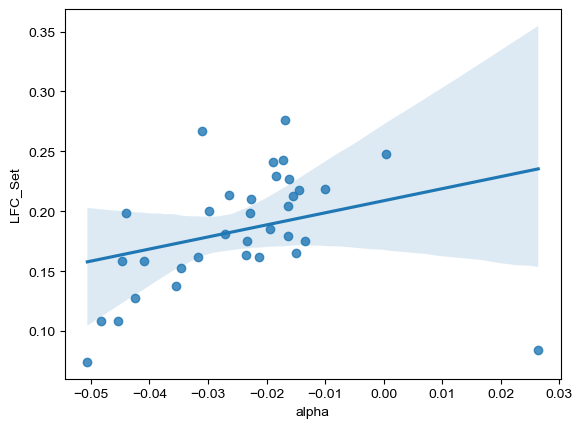

In [102]:
df3 = df2[df2["Big_Cutoff"].isin(["All"])]
df4 = df2[df2["Big_Cutoff"].isin(["100000"])]
df4 = df4[["Cell type", 'PosLFC_Cutoff']]
df4.columns = ["Cell type", "LFC_Set"]
df3 = df3.set_index("Cell type").join(df4.set_index("Cell type"))
from scipy.stats import spearmanr,pearsonr
print(spearmanr(df3["LFC_Set"], df3["alpha"]))
sns.regplot(data = df3, x = "alpha", y = "LFC_Set")

In [100]:
df3.sort_values("alpha")

,ID,StartSpecSup,Big_Cutoff,PosLFC_Cutoff,NegLFC_Cutoff,Metric,Median Fixed PhyloP,Number Fixed Variants,Median Polymorphic PhyloP,Number Polymorphic Variants,Fisher exact p-value,MWU p-value,Fisher exact p-value; alt greater,MWU p-value; alt greater,alpha,Cutoff,"[[dc1, du1], [pc1, pu1]]","[[dc2, du2], [pc2, pu2]]",Proportion,LFC_Set
Cell type,,,,,,,,,,,,,,,,,,,,
FH endocard.,NoRepeatsNoPseudos,0,All,0.0,0.0,Absolute log fold-change,0.017200,4558289,0.017927,1204372,1.940284e-137,2.219600e-153,1.000000e+00,1.000000e+00,-0.053694,0.024959,"[[1766406, 2791883], [481748, 722624]]","[[1766412, 2791877], [481750, 722622]]",0.6,0.134647
FH peri.,NoRepeatsNoPseudos,0,All,0.0,0.0,Absolute log fold-change,0.016139,4558289,0.016683,1204372,2.912091e-134,4.316170e-166,1.000000e+00,1.000000e+00,-0.053042,0.021986,"[[1767075, 2791214], [481748, 722624]]","[[1767078, 2791211], [481749, 722623]]",0.6,0.088419
AC Oligo.,NoRepeatsNoPseudos,0,All,0.0,0.0,Absolute log fold-change,0.021524,4558289,0.022259,1204372,8.847911e-116,2.641530e-119,1.000000e+00,1.000000e+00,-0.049097,0.031306,"[[1771138, 2787151], [481748, 722624]]","[[1771141, 2787148], [481749, 722623]]",0.6,0.212846
FH endoth.,NoRepeatsNoPseudos,0,All,0.0,0.0,Absolute log fold-change,0.019435,4558289,0.020194,1204372,1.678798e-110,1.402398e-111,1.000000e+00,1.000000e+00,-0.047915,0.029005,"[[1772364, 2785925], [481748, 722624]]","[[1772366, 2785923], [481751, 722621]]",0.6,0.265667
FH fibro.,NoRepeatsNoPseudos,0,All,0.0,0.0,Absolute log fold-change,0.022326,4558289,0.022982,1204372,3.395867e-105,5.289672e-130,1.000000e+00,1.000000e+00,-0.046700,0.030088,"[[1773616, 2784673], [481748, 722624]]","[[1773619, 2784670], [481749, 722623]]",0.6,0.129618
AH smooth musc.,NoRepeatsNoPseudos,0,All,0.0,0.0,Absolute log fold-change,0.020299,4558289,0.021013,1204372,1.769960e-101,5.844095e-135,1.000000e+00,1.000000e+00,-0.045831,0.028537,"[[1774513, 2783776], [481747, 722625]]","[[1774519, 2783770], [481749, 722623]]",0.6,0.158724
FG immune,NoRepeatsNoPseudos,0,All,0.0,0.0,Absolute log fold-change,0.017320,4558289,0.017862,1204372,6.444113e-97,1.813262e-83,1.000000e+00,1.000000e+00,-0.044744,0.024779,"[[1775647, 2782642], [481748, 722624]]","[[1775647, 2782642], [481750, 722622]]",0.6,0.219518
AC astro.,NoRepeatsNoPseudos,0,All,0.0,0.0,Absolute log fold-change,0.022492,4558289,0.023152,1204372,3.858923e-86,2.491614e-94,1.000000e+00,1.000000e+00,-0.042071,0.031507,"[[1778422, 2779867], [481748, 722624]]","[[1778423, 2779866], [481749, 722623]]",0.6,0.190934
AP D1 inh neur.,NoRepeatsNoPseudos,0,All,0.0,0.0,Absolute log fold-change,0.023706,4558289,0.024410,1204372,4.939647e-72,2.063871e-84,1.000000e+00,1.000000e+00,-0.038311,0.033634,"[[1782342, 2775947], [481748, 722624]]","[[1782347, 2775942], [481749, 722623]]",0.6,0.172015


In [33]:
df4

,Cell type,LFC_Set
